# Working thru Software Receiver Design

On to Chapter 2

## Synchronization notes
Places where sync can occur (all on receiver side):
* Symbol phase sync (when within the interval $T$ to sample)
* Symbol freq sync (accounts for difference in oscilators at transmit and receive)
* Carrier phase sync
* Carrier freq sync
* Frame sync (finding the start of each message block

## Equalization
Filtering to minimize the effects of intersymbol interference and frequency selective fading.

## Coding and Decoding
Coding is often making data redundant within a transmission. Coding is often making data redundant within a transmission. :P We'll look into Huffman code which makes frequent symbols shorter and infrequent symbols longer (like Morse code) 

Definitions:
1. intersymbol interference - because of the transmission channel, multiple copies of the symbols (each scaled differently) show up at the receiver.
2. frequency selective fading - the channel may atenuate different frequencies by different amounts (fast fading)
3. channel capacity - the number of bits that can be sent in a certain bandwidth
4. linear block codes - cluster symbols together and then add extra bits (e.g., parity bits)

## Chapter 3
Looks like more notes, not much coding.


In [42]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


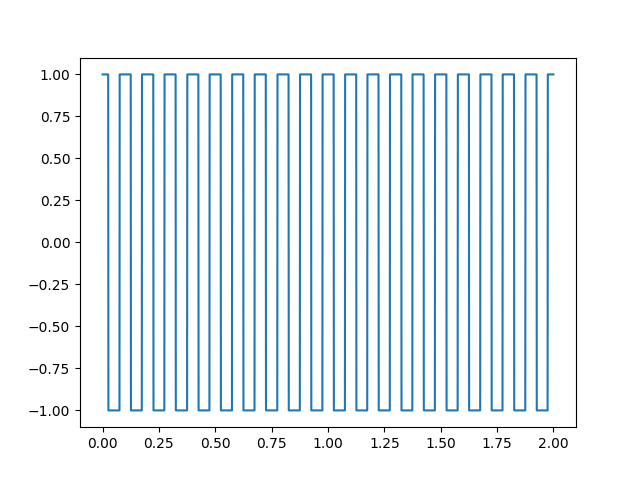

In [14]:
## from listing 3.1, specsquare.m
f = 10
time = 2
Ts = 1.0/1000
t = np.linspace(0,time,int(time/Ts)+1)
#print(t)
x = np.sign( np.cos(2*np.pi * f * t) )

plt.plot(t,x)
plt.show()

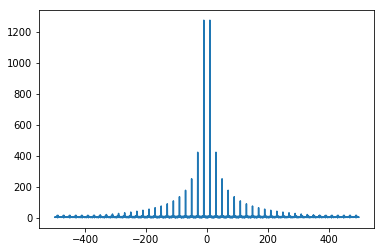

In [3]:
fourier = np.fft.fft(x)
n = len(x)
freq = np.fft.fftfreq(n, d=Ts)

plt.plot(freq, abs(fourier))
plt.show()

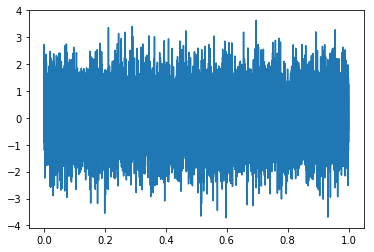

In [4]:
## from listing 3.2 specnoise.m
time = 1
Ts = 1.0/10000
t = np.linspace(0,time,int(time/Ts)+1)
x = np.random.randn(len(t))

plt.plot(t,x)
plt.show()

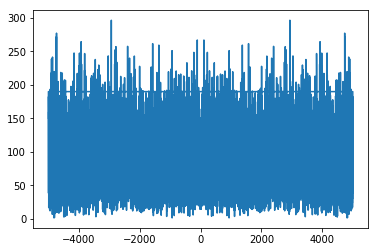

In [5]:
fourier = np.fft.fft(x)
n = len(x)
freq = np.fft.fftfreq(n, d=Ts)

plt.plot(freq, abs(fourier))
plt.show()

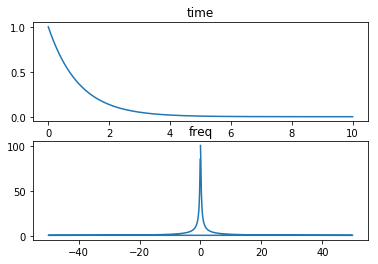

In [6]:
## exercise 3.3 a.  An exponential pulse
time = 10
Ts = 1.0/100
t = np.linspace(0,time,int(time/Ts)+1)
#print(t)
x = np.exp(-1*t) ## e^{-t}

fig, axs = plt.subplots(2, 1)
## plot time
axs[0].plot(t,x)
axs[0].set_title("time")
fourier = np.fft.fft(x)
n = len(x)
freq = np.fft.fftfreq(n, d=Ts)
## plot freq
axs[1].plot(freq, abs(fourier))
axs[1].set_title("freq")

plt.show()

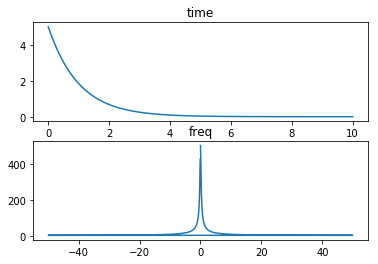

In [7]:
## exercise 3.3 b.  A scaled exponential pulse s(t) = 5e^{-t}
time = 10
Ts = 1.0/100
t = np.linspace(0,time,int(time/Ts)+1)
#print(t)
x = 5*np.exp(-1*t) ## e^{-t}

fig, axs = plt.subplots(2, 1)
## plot time
axs[0].plot(t,x)
axs[0].set_title("time")
fourier = np.fft.fft(x)
n = len(x)
freq = np.fft.fftfreq(n, d=Ts)
## plot freq
axs[1].plot(freq, abs(fourier))
axs[1].set_title("freq")

plt.show()

3.3 a. and b. shows that the amplitude of the fft output is scaled by the input

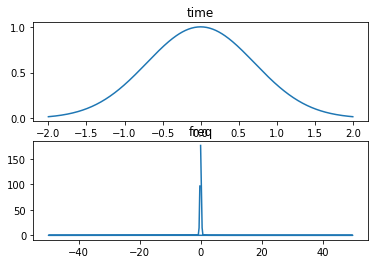

In [8]:
## exercise 3.3 c.  A Gaussian Pulse s(t) = e^{-t^2}
time = 4
Ts = 1.0/100
t = np.linspace(-2, time-2, int(time/Ts)+1)
#print(t)
x = np.exp(-1* np.power(t, 2)) ## e^{-t^2}

fig, axs = plt.subplots(2, 1)
## plot time
axs[0].plot(t,x)
axs[0].set_title("time")
fourier = np.fft.fft(x)
n = len(x)
freq = np.fft.fftfreq(n, d=Ts)
## plot freq
axs[1].plot(freq, abs(fourier))
axs[1].set_title("freq")

plt.show()

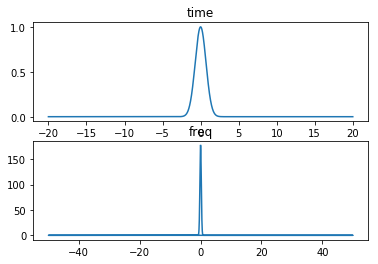

In [9]:
## exercise 3.3 4.  A Gaussian Pulse s(t) = e^{-t^2} larger interval
time = 40
Ts = 1.0/100
t = np.linspace(-20, time-20, int(time/Ts)+1)
#print(t)
x = np.exp(-1* np.power(t, 2)) ## e^{-t^2}

fig, axs = plt.subplots(2, 1)
## plot time
axs[0].plot(t,x)
axs[0].set_title("time")
fourier = np.fft.fft(x)
n = len(x)
freq = np.fft.fftfreq(n, d=Ts)
## plot freq
axs[1].plot(freq, abs(fourier))
axs[1].set_title("freq")

plt.show()

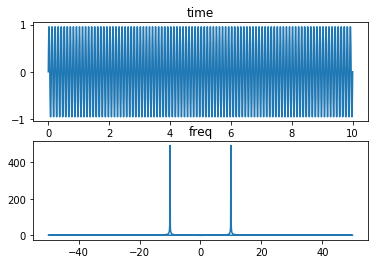

In [10]:
## exercise 3.3 e.  sinusoid s(t) = sin(2pi*f*t + phi) f = 10, phi = 0
time = 10
Ts = 1.0/100
f = 10
t = np.linspace(0, time, int(time/Ts)+1)
#print(t)
phi = 0
x = np.sin(2*np.pi * f * t + phi)

fig, axs = plt.subplots(2, 1)
## plot time
axs[0].plot(t,x)
axs[0].set_title("time")
fourier = np.fft.fft(x)
n = len(x)
freq = np.fft.fftfreq(n, d=Ts)
## plot freq
axs[1].plot(freq, abs(fourier))
axs[1].set_title("freq")

plt.show()

<IPython.core.display.Javascript object>


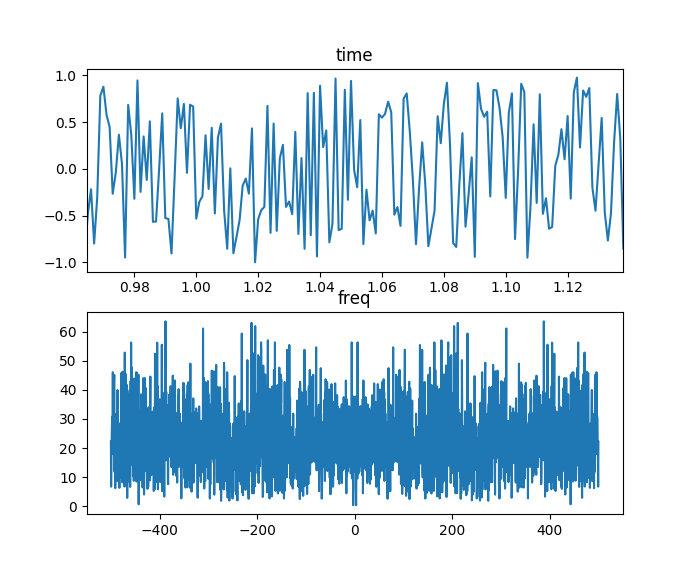

In [15]:
## exercise 3.4 a. signal that is uniformly distributed on [-1,1]
time = 2
Ts = 1.0/1000
t = np.linspace(0, time, int(time/Ts)+1)
x = (2*np.random.rand(len(t))) - 1

fig, axs = plt.subplots(2, 1)
## plot time
axs[0].plot(t,x)
axs[0].set_title("time")
fourier = np.fft.fft(x)
n = len(x)
freq = np.fft.fftfreq(n, d=Ts)
## plot freq
axs[1].plot(freq, abs(fourier))
axs[1].set_title("freq")

plt.show()

<IPython.core.display.Javascript object>


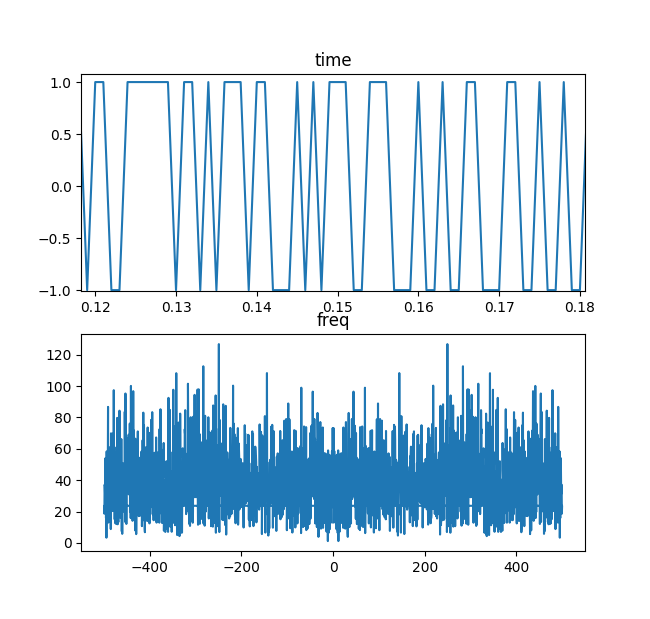

In [19]:
## exercise 3.4 b. signal that is +1 with p=.5 and -1 with p=.5
time = 2
Ts = 1.0/1000
t = np.linspace(0, time, int(time/Ts)+1)
x = np.sign( (2*np.random.rand(len(t))) - 1 )
fig, axs = plt.subplots(2, 1)
## plot time
axs[0].plot(t,x)
axs[0].set_title("time")
fourier = np.fft.fft(x)
n = len(x)
freq = np.fft.fftfreq(n, d=Ts)
## plot freq
axs[1].plot(freq, abs(fourier))
axs[1].set_title("freq")

plt.show()


<IPython.core.display.Javascript object>


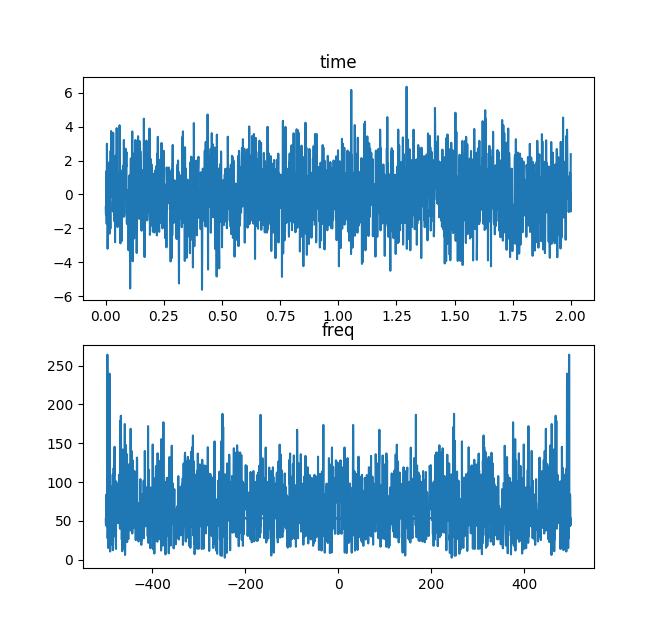

In [33]:
## exercise 3.4 c. signal that is normally distrbuted. mean=0 variance=3 (variance is the average of the difference from mean)
time = 2
Ts = 1.0/1000
t = np.linspace(0, time, int(time/Ts)+1)
x = np.random.randn(len(t)) * 1.732 ## 1.732 = squareroot(3)

fig, axs = plt.subplots(2, 1)
## plot time
axs[0].plot(t,x)
axs[0].set_title("time")
fourier = np.fft.fft(x)
n = len(x)
freq = np.fft.fftfreq(n, d=Ts)
## plot freq
axs[1].plot(freq, abs(fourier))
axs[1].set_title("freq")

plt.show()

<IPython.core.display.Javascript object>


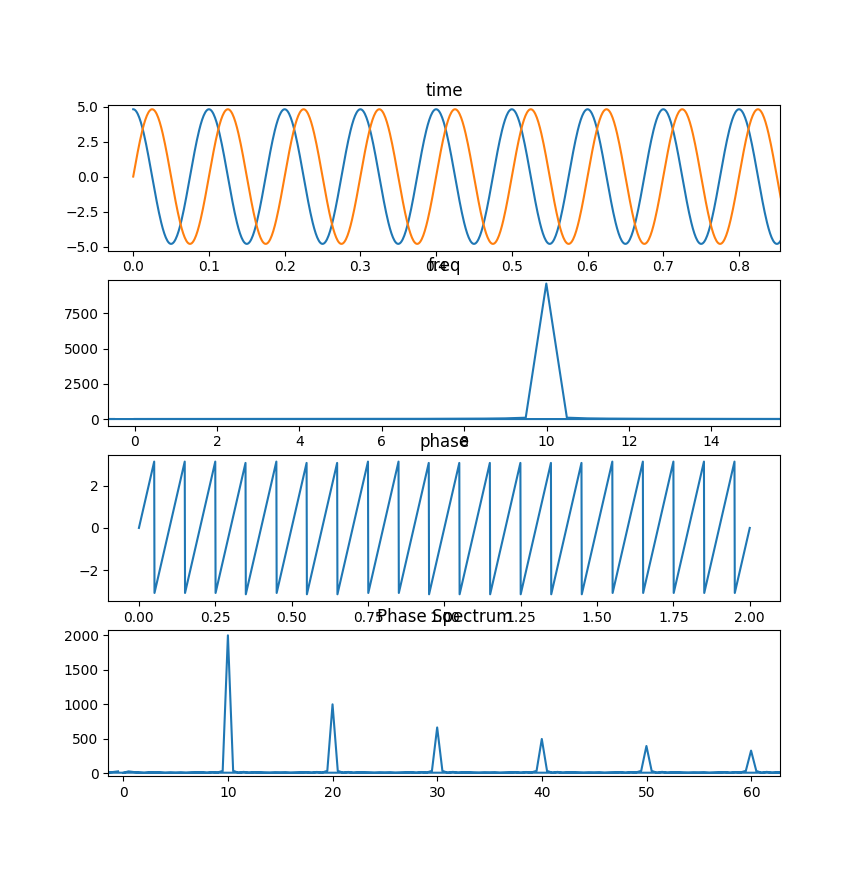

In [13]:
## exercise 3.5 a. plot the phase spectrum of a sine/cosine wave
time = 2
Ts = 1.0/1000
f = 10
phi = 0.5*np.pi
t = np.linspace(0, time, int(time/Ts)+1)
x = np.exp(1j * 2*np.pi * f * t + phi)
fig, axs = plt.subplots(4, 1)
## plot time
axs[0].plot(t,x.real, t,x.imag)
axs[0].set_title("time")

fourier = np.fft.fft(x)
n = len(x)
freq = np.fft.fftfreq(n, d=Ts)
## plot freq
axs[1].plot(freq, abs(fourier))
axs[1].set_title("freq")

phase = np.angle(x)
## plot phase
axs[2].plot(t, phase)
axs[2].set_title("phase")

fourier_phase = np.fft.fft(phase)
n_phase = len(phase)
freq_phase = np.fft.fftfreq(n_phase, d=Ts)
## plot freq
axs[3].plot(freq_phase, abs(fourier_phase))
axs[3].set_title("Phase Spectrum")

plt.show()

<IPython.core.display.Javascript object>


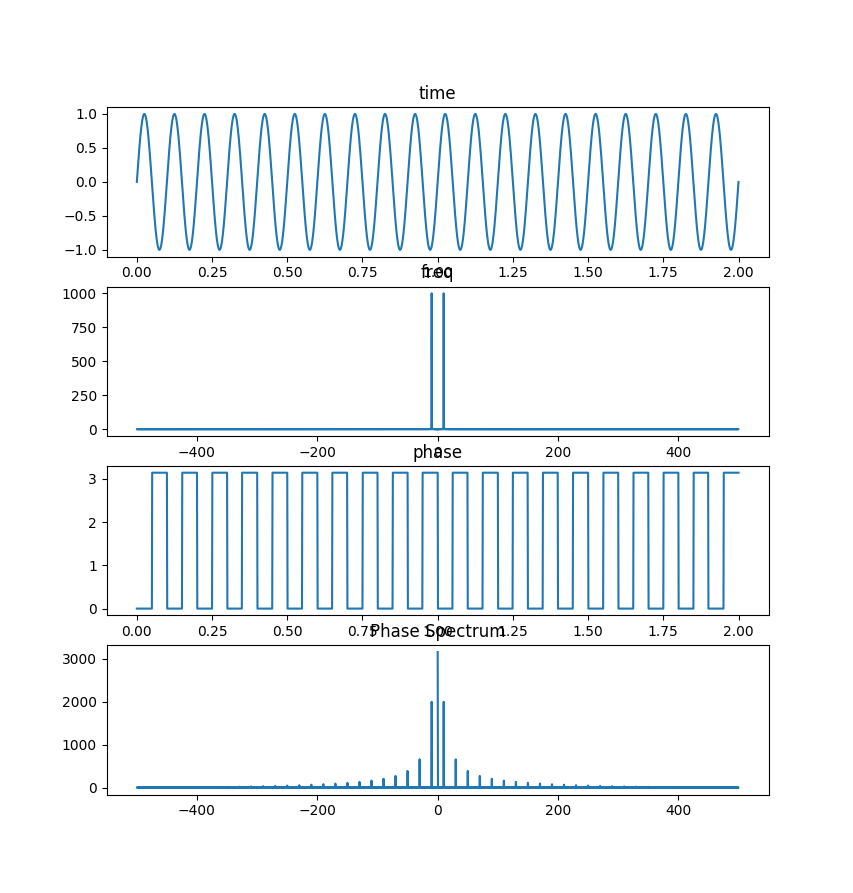

In [14]:
## exercise 3.5 a. plot the phase spectrum of a sine/cosine wave
time = 2
Ts = 1.0/1000
f = 10
phi = 0*np.pi
t = np.linspace(0, time, int(time/Ts)+1)
x = np.sin(2*np.pi * f * t + phi)
fig, axs = plt.subplots(4, 1)
## plot time
axs[0].plot(t,x)
axs[0].set_title("time")

fourier = np.fft.fft(x)
n = len(x)
freq = np.fft.fftfreq(n, d=Ts)
## plot freq
axs[1].plot(freq, abs(fourier))
axs[1].set_title("freq")

phase = np.angle(x)
## plot phase
axs[2].plot(t, phase)
axs[2].set_title("phase")

fourier_phase = np.fft.fft(phase)
n_phase = len(phase)
freq_phase = np.fft.fftfreq(n_phase, d=Ts)
## plot freq
axs[3].plot(freq_phase, abs(fourier_phase))
axs[3].set_title("Phase Spectrum")

plt.show()

<IPython.core.display.Javascript object>


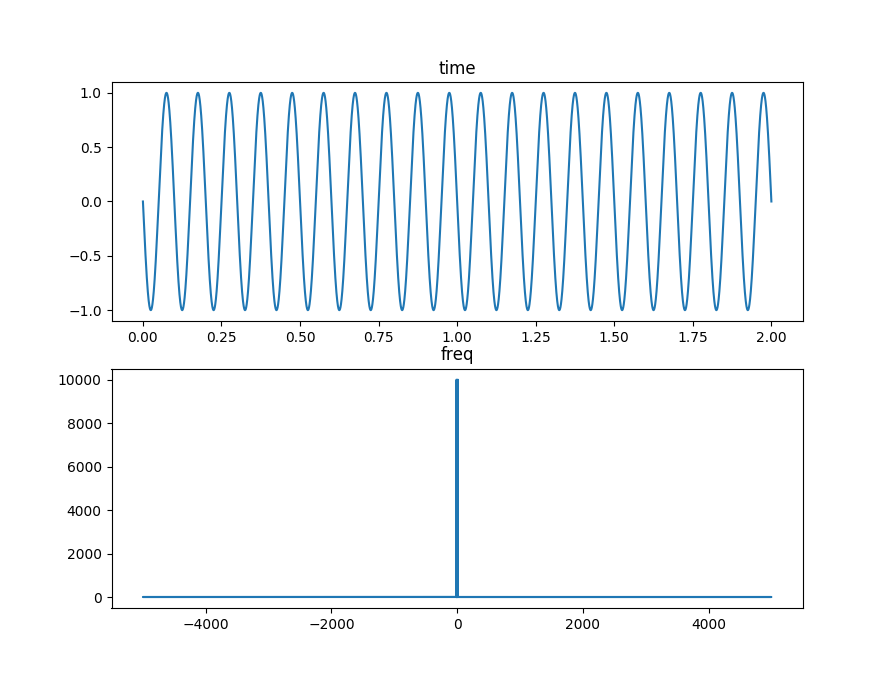

In [21]:
## exercise 3.6 
time = 2
Ts = 1.0/10000
f = 10
phi = 0.5*np.pi
t = np.linspace(0, time, int(time/Ts)+1)
x = np.cos(2*np.pi * f * t + phi)
fig, axs = plt.subplots(2, 1)
## plot time
axs[0].plot(t,x)
axs[0].set_title("time")

fourier = np.fft.fft(x)
n = len(x)
freq = np.fft.fftfreq(n, d=Ts)
## plot freq
axs[1].plot(freq, abs(fourier))
axs[1].set_title("freq")

plt.show()

<IPython.core.display.Javascript object>


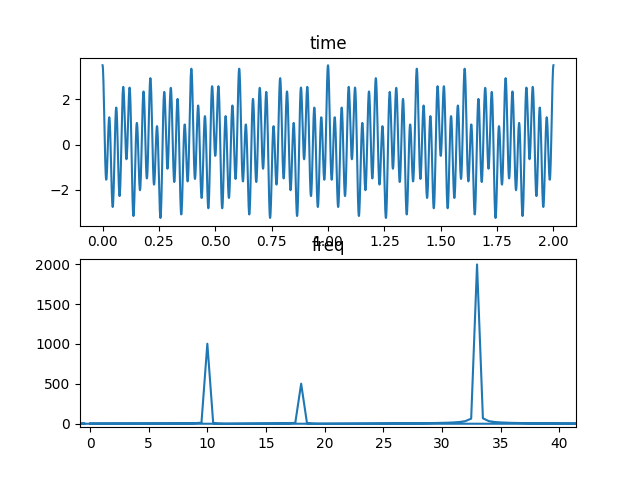

In [23]:
## exercise 3.7 
time = 2
Ts = 1.0/1000
f1 = 10
f2 = 18
f3 = 33
phi = 0*np.pi
t = np.linspace(0, time, int(time/Ts)+1)
x1 = np.cos(2*np.pi * f1 * t + phi)
x2 = np.cos(2*np.pi * f2 * t + phi)
x3 = np.cos(2*np.pi * f3 * t + phi)
x = x1 + (0.5 * x2) + (2 * x3)
fig, axs = plt.subplots(2, 1)
## plot time
axs[0].plot(t,x)
axs[0].set_title("time")

fourier = np.fft.fft(x)
n = len(x)
freq = np.fft.fftfreq(n, d=Ts)
## plot freq
axs[1].plot(freq, abs(fourier))
axs[1].set_title("freq")

plt.show()

<IPython.core.display.Javascript object>


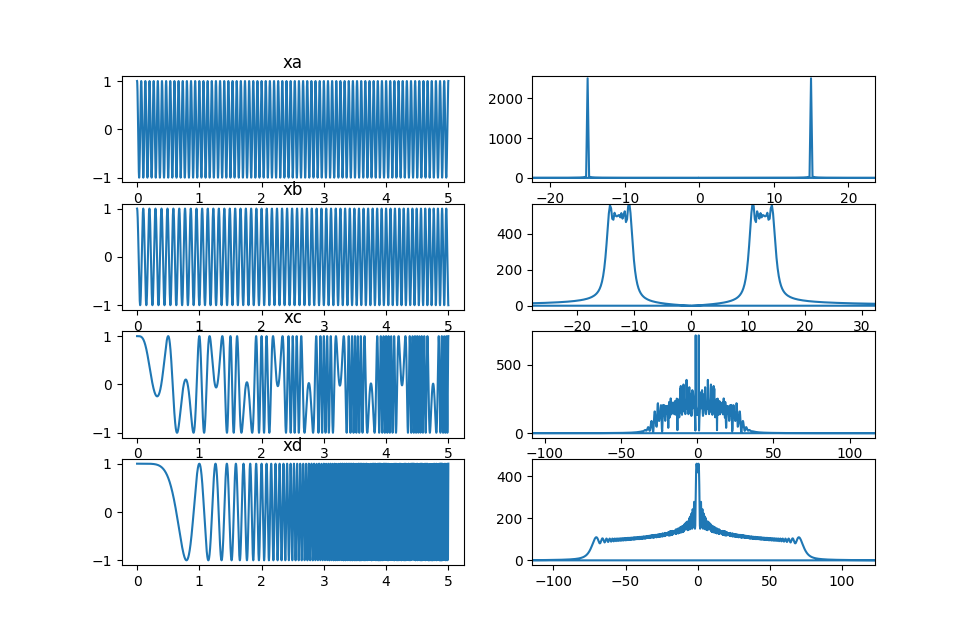

In [37]:
## exercise 3.8 
time = 5
Ts = 1.0/1000
f = 10
phi = 0*np.pi
t = np.linspace(0, time, int(time/Ts)+1)
xa = np.cos(2*np.pi * f * t + 10*np.pi*t)
xb = np.cos(2*np.pi * f * t + np.pi*t*t)
xc = np.cos(2*np.pi * np.sin(2*np.pi*t) * t + phi)
xd = np.cos(2*np.pi * t*t * t + phi)
fig, axs = plt.subplots(4, 2)
## plot time
axs[0][0].plot(t,xa)
axs[0][0].set_title("xa")

axs[1][0].plot(t,xb)
axs[1][0].set_title("xb")

axs[2][0].plot(t,xc)
axs[2][0].set_title("xc")

axs[3][0].plot(t,xd)
axs[3][0].set_title("xd")

## plot freq
n = len(xa)
freq = np.fft.fftfreq(n, d=Ts)

fouriera = np.fft.fft(xa)
axs[0][1].plot(freq, abs(fouriera))

fourierb = np.fft.fft(xb)
axs[1][1].plot(freq, abs(fourierb))

fourierc = np.fft.fft(xc)
axs[2][1].plot(freq, abs(fourierc))

fourierd = np.fft.fft(xd)
axs[3][1].plot(freq, abs(fourierd))

plt.show()

<IPython.core.display.Javascript object>


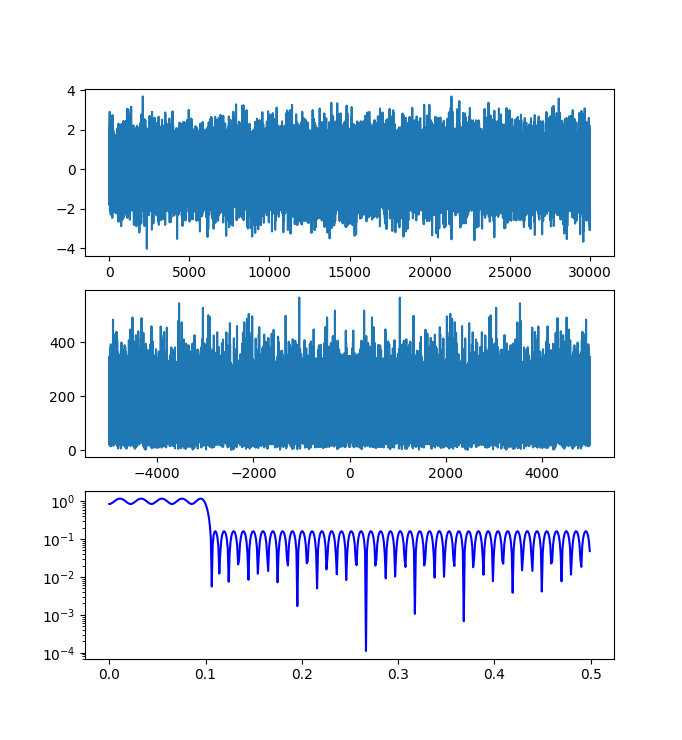

In [46]:
## listing 3.4 filternoise
time = 3
Ts = 1.0/10000
x = np.random.randn(int(time/Ts))
t = np.linspace(0,int(time/Ts)-1, int(time/Ts))
fig, axs = plt.subplots(3, 1)
axs[0].plot(t,x)
n = len(x)
freq = np.fft.fftfreq(n, d=Ts)
fourier = np.fft.fft(x)
axs[1].plot(freq, abs(fourier))

freqs = [0, 1000, 1050, 5000]
amps = [1, 0]
## b = firpm(100, freqs, amps)
## ylp = filter(b, 1 , x)

bpass = signal.remez(100, freqs, amps, fs=int(1/Ts))
freq, response = signal.freqz(bpass)
ampl = np.abs(response)

axs[2].semilogy(freq/(2*np.pi), ampl, 'b-')

plt.show()
